In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import seaborn as sns

In [2]:
votes = np.genfromtxt('MDA3_data/votes.txt')


In [6]:
votes[0]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
av_vote = np.mean(votes,axis = 0)

In [87]:
av_vote

array([0.33407821, 0.41452514, 0.41899441, 0.45027933, 0.60558659,
       0.61340782, 0.68826816, 0.7027933 , 0.72513966])

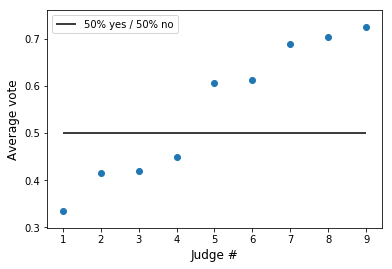

In [29]:
plt.scatter(range(1,10),av_vote)
plt.xticks(range(1,10))
plt.xlabel('Judge #', fontsize = 12)
plt.ylabel('Average vote', fontsize = 12)
plt.hlines(0.5, 1, 9, label = '50% yes / 50% no')
plt.legend()

### Binomial test

In [106]:
_, counts0 = np.unique(votes[:,0], return_counts = True)
# fisher_table = [counts0, [sum(counts0)/2,sum(counts0)/2]]

In [107]:
# stats.fisher_exact(np.transpose(fisher_table))

In [108]:
# for i in range(9):
#     _, counts = np.unique(votes[:,i],return_counts = True)
#     _, p = stats.chisquare(counts/sum(counts))
#     print(p)

In [111]:
stats.binom_test(counts0)
#Perform a test that the probability of success is p.

1.7345525168304395e-23

### One-way Kruskal_Wallis

In [112]:
stats.kruskal(votes[:,0], votes[:,1], votes[:,2], votes[:,3], votes[:,4], votes[:,5], votes[:,6], votes[:,7], votes[:,8])

KruskalResult(statistic=623.1801439507392, pvalue=2.426268044912742e-129)

It's higher than H_critical (inferred from chi-distr, a=0.05, g = ?) => reject hypothesis

### Correlations

In [82]:
cor_mat = np.empty((9,9))
p_vals = np.empty((9,9))
for i in range(9):
    for j in range(9):
        cor_mat[i][j],p_vals[i][j] = stats.pearsonr(votes[:,i], votes[:,j])

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9')]

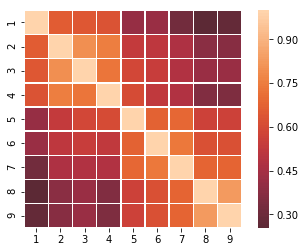

In [47]:
heatmap = sns.heatmap(cor_mat, linewidth=0.5, square=True, center = 0)
heatmap.set_xticklabels(labels = range(1,10)) 
heatmap.set_yticklabels(labels = range(1,10)) 

In [83]:
p_vals[7][8]

1.8813606257154169e-230

In [119]:
_, counts89 = np.unique(votes[:,[7,8]], return_counts = True, axis = 0)

In [121]:
stats.chi2_contingency(counts89.reshape((2,2)))

(615.0848794014158,
 8.765663556729463e-136,
 1,
 array([[ 73.11284916, 192.88715084],
        [172.88715084, 456.11284916]]))